In [20]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns # for heatmap

### Read in the data

NOTE: last three rows are blank so we should drop/delete them

In [33]:
data = pd.read_csv("./data/SpotifyData.csv")
df = pd.DataFrame(data)
df = df.iloc[:-3, :] # last 3 rows are all NAs
df.head(10)

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
5,Magic (feat. Rivers Cuomo),B.o.B,atl hip hop,2010.0,2022‑02‑17,82.0,93.0,55.0,-4.0,35.0,79.0,196.0,1.0,34.0,71.0,2010.0,Solo
6,The Time (Dirty Bit),Black Eyed Peas,dance pop,2010.0,2022‑02‑17,128.0,81.0,82.0,-8.0,60.0,44.0,308.0,7.0,7.0,75.0,2010.0,Band/Group
7,Imma Be,Black Eyed Peas,dance pop,2009.0,2022‑02‑17,92.0,52.0,60.0,-7.0,31.0,41.0,258.0,18.0,37.0,71.0,2010.0,Band/Group
8,Talking to the Moon,Bruno Mars,dance pop,2010.0,2022‑02‑17,146.0,59.0,50.0,-5.0,11.0,8.0,218.0,51.0,3.0,87.0,2010.0,Solo
9,Just the Way You Are,Bruno Mars,dance pop,2010.0,2022‑02‑17,109.0,84.0,64.0,-5.0,6.0,42.0,221.0,1.0,4.0,86.0,2010.0,Solo


### Looking at "pop" (potential response variable)

In [30]:
print(df["pop"].max())
print(df["pop"].min())

95.0
35.0


In [34]:
df[df["pop"] == 95.0]

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
392,Sweater Weather,The Neighbourhood,modern alternative rock,2013.0,2020‑06‑11,124.0,81.0,61.0,-3.0,10.0,40.0,240.0,5.0,3.0,95.0,2013.0,Band/Group


In [35]:
df[df["pop"] == 35.0]

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
182,Read All About It,Professor Green,grime,2021.0,2020‑06‑16,101.0,75.0,66.0,-6.0,22.0,45.0,236.0,34.0,4.0,35.0,2011.0,Solo


### Weird quirks w/ "year released"

For some reason there are songs reportedly released in 2020 and 2021. There is a remastered song in the data from 1975 as well.

In [22]:
df["year released"].value_counts()

2018.0    112
2012.0    109
2014.0    101
2017.0     99
2015.0     99
2010.0     94
2011.0     93
2019.0     87
2013.0     86
2016.0     86
2009.0     24
2020.0      6
2021.0      3
1975.0      1
Name: year released, dtype: int64

In [32]:
df.loc[df["year released"] == 2020.0]
df.loc[df["year released"] == 1975.0]

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
982,Bohemian Rhapsody - Remastered 2011,Queen,classic rock,1975.0,2020‑06‑22,144.0,40.0,39.0,-10.0,24.0,23.0,354.0,29.0,5.0,77.0,2019.0,Band/Group


### Correlation b/w variables

To find highly correlated variables, we create a heatmap:

<AxesSubplot:>

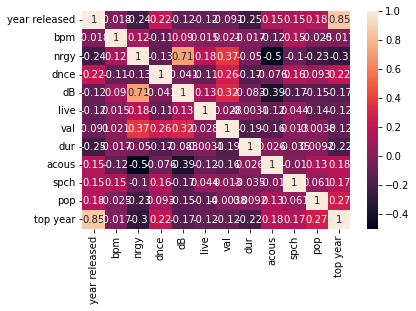

In [27]:
sns.heatmap(df.corr(), annot=True)

`bpm` and `dB` look to be relatively correlated. The scatterplot between these two is below:

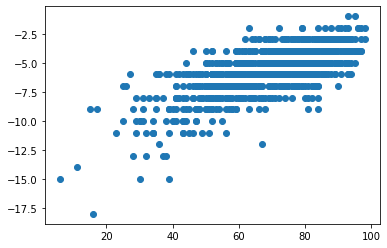

In [28]:
plt.pyplot.scatter(df["nrgy"], df["dB"])

## PRINCIPAL COMPONENT ANALYSIS

#### Standardize Data

In [214]:
from sklearn.preprocessing import StandardScaler
features = ["bpm", "nrgy", "live", "val", "dur", "acous", "spch"]
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,["top year"]].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [215]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2'])

In [216]:
principalDf

,principal component 1,principal component 2
0,-0.577665,0.240788
1,-2.353735,0.022642
2,0.506527,-1.348559
3,-0.226301,-0.648816
4,0.072058,-1.226470
...,...,...
995,-0.146905,1.640648
996,0.291488,-0.581268
997,-0.453803,-0.723666
998,-0.095402,0.422570


In [217]:
fin_df = pd.concat([principalDf, df[["top year"]]], axis = 1)
fin_df

,principal component 1,principal component 2,top year
0,-0.577665,0.240788,2010.0
1,-2.353735,0.022642,2010.0
2,0.506527,-1.348559,2010.0
3,-0.226301,-0.648816,2010.0
4,0.072058,-1.226470,2010.0
...,...,...,...
995,-0.146905,1.640648,2019.0
996,0.291488,-0.581268,2019.0
997,-0.453803,-0.723666,2019.0
998,-0.095402,0.422570,2019.0


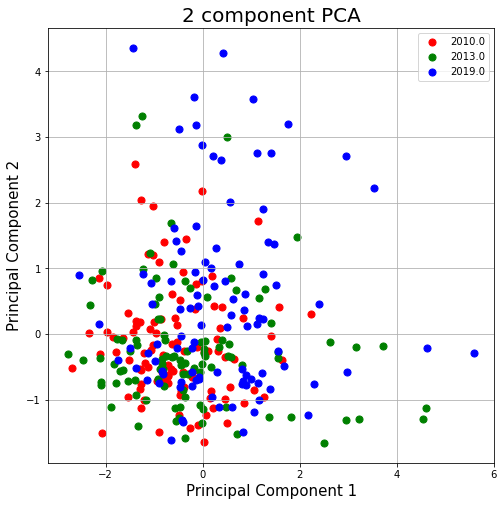

In [218]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [2010.0, 2013.0, 2019.0]
colors = ["r", "g", "b"]
for target, color in zip(targets,colors):
    indicesToKeep = fin_df["top year"] == target
    ax.scatter(fin_df.loc[indicesToKeep, 'principal component 1']
               , fin_df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()